---

# The Single Neuron Model: The Perceptron & Predicting Credit Risk

The perceptron is a machine learning technique that is based on the behaviour of biological neurons. Broadly speaking, a perceptron has three components: 
- Pre-activation---a linear combination of weights plus a bias that serves as the "stimulus" for the neuron
- Post-activation---if the stimulus is "intense" enough, then the neuron "fires" and returns a value according to some rule
- Activation function---once the neuron "fires," it processes the stimulus through a predefined function, $\phi$

We will train and implement this model on a dataset of credit risk profiles collected by UCI to demonstrate how it works and some real-world applications. Let's begin by importing the relevant libraries.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from perceptron import Perceptron

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

---

Next, load in the dataset that you'll be training on. Load the data into a dataframe and view it.

---

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
    'Savings', 'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex',
    'OtherDebtors', 'ResidenceSince', 'Property', 'Age',
    'OtherInstallmentPlans', 'Housing', 'ExistingCredits',
    'Job', 'NumPeopleLiable', 'Telephone', 'ForeignWorker', 'Target'
]

df = pd.read_csv(url, sep=' ', names=columns)
df

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,ExistingCredits,Job,NumPeopleLiable,Telephone,ForeignWorker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


---

Next, preprocess the data by encoding categorical features and scaling numeric features. Although this dataset has many dimensions, we'll focus on two (CreditAmount and Duration) so that the classifications can easily be visualized on a 2-dimensional plane.

---

In [3]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop('Target', axis=1)
X = df[['CreditAmount', 'Duration']]
y = df['Target']

# Convert labels: 1 = good, 2 = bad → want 1 = good, -1 = bad
y = y.replace({1: 1, 2: -1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


---

An important part of training any machine learning algorithm is separating the training set from the testing set. Here, we will randomly partition some of the data to be used for testing while keeping the training data completely distinct from it.

---

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

---

With the data now separated, it's time to train the perceptron! We will be using the perceptron class found in the same folder as this notebook, which takes as its first input a learning rate and its second input a maximum number of epochs over which to iterate. 

---

In [5]:
model = Perceptron(0.01, 1000)
model.train(X_train, y_train)

---

Next, we'll use the predict method to see how well the perceptron is able to classify data outside of its test set, and then print the confusion matrix which contains the number of correct and incorrect classifications in each group.

---

In [6]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])
print("Confusion Matrix:\n", cm)


Test Accuracy: 70.50%
Confusion Matrix:
 [[140   0]
 [ 59   1]]


---

It's easier to see how the perceptron was trained by visualizing it on a graph and plotting the decision boundary. Using the plot_decision_regions method below, we can check what the model inferred.

---

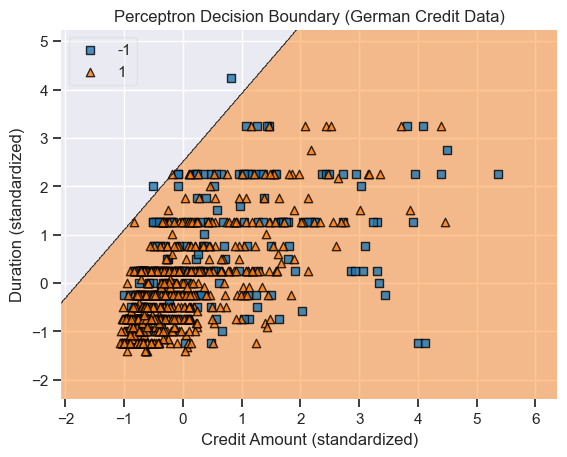

In [10]:
# Plot decision regions
plot_decision_regions(X=X_scaled, y=y.to_numpy(), clf=model, legend=2)

# Final touches
plt.xlabel('Credit Amount (standardized)')
plt.ylabel('Duration (standardized)')
plt.title('Perceptron Decision Boundary (German Credit Data)')
plt.show()

---

As we can see above, because the data was not very seperable, the perceptron ended up learning to classify almost everything as low-risk. This isn't an ideal outcome, but we can see what the decision boundary may have looked like with different learning rates and epochs.

---

In [11]:
model = Perceptron(0.5, 50)
model.train(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])
print("Confusion Matrix:\n", cm)

Test Accuracy: 67.50%
Confusion Matrix:
 [[127  13]
 [ 52   8]]


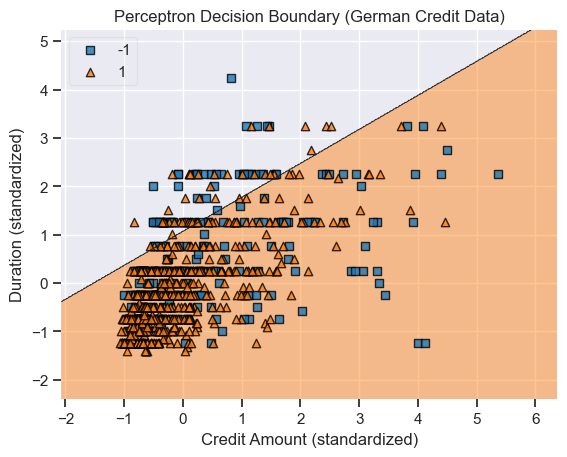

In [12]:
# Plot decision regions
plot_decision_regions(X=X_scaled, y=y.to_numpy(), clf=model, legend=2)

# Final touches
plt.xlabel('Credit Amount (standardized)')
plt.ylabel('Duration (standardized)')
plt.title('Perceptron Decision Boundary (German Credit Data)')
plt.show()

---

Using a higher learning rate causes the model to make much larger corrections between epochs. Let's try the above learning rate again with a greater number of epochs to allow the perceptron more time to converge to a decision boundary.

---

In [19]:
model = Perceptron(0.5, 1000)
model.train(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])
print("Confusion Matrix:\n", cm)

Test Accuracy: 70.50%
Confusion Matrix:
 [[134   6]
 [ 53   7]]


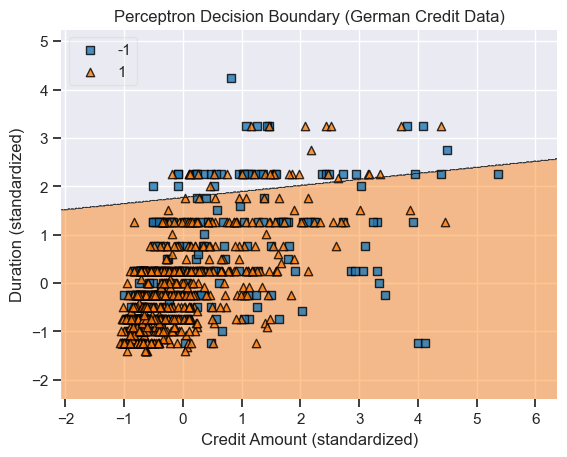

In [20]:
# Plot decision regions
plot_decision_regions(X=X_scaled, y=y.to_numpy(), clf=model, legend=2)

# Final touches
plt.xlabel('Credit Amount (standardized)')
plt.ylabel('Duration (standardized)')
plt.title('Perceptron Decision Boundary (German Credit Data)')
plt.show()

---

It looks like the decision boundary didn't change much between epoch 50 and epoch 1000, which might lead us to believe that the model was able to minimize error relatively early-on. We can verify this by plotting the error of the model over time.

---

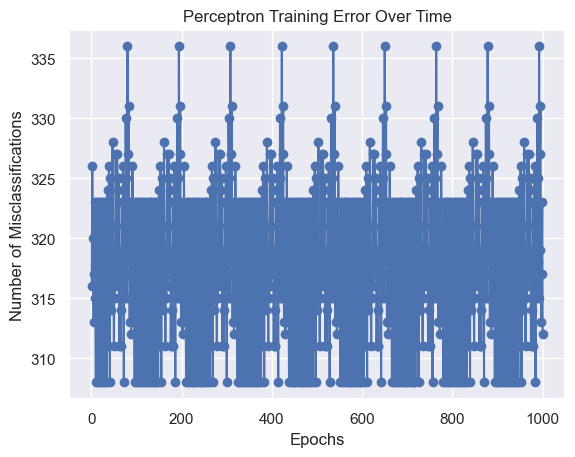

In [21]:
# Plot the error over time
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Training Error Over Time')
plt.show()

---

Woah! That's not what the error should look like for a perceptron, which confirms our initial suspicions that the data was not seperable enough for a stable prediction. This means that the model can never converge to a solution and simply osciollates back and forth. We can use this as a motivating example for discussing logistic regression in a later notebook, but we can also try a few more dimensions of the data to see if we can isolate any trends.

---